<a href="https://colab.research.google.com/github/Murcha1990/ML_AI24/blob/main/Lesson15_Trees/AI_ML_DecisionTrees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Решающие деревья

Это логический алгоритм классификации, решающий задачи классификации и регрессии. Данный алгоритм представляет собой объединение логических условий в структуру дерева.

В зависимости от пространственной структуры данных, один типов моделей из них будет работать лучше:

* Если данные хорошо линейно разделимы,  то линейная модель;
* Если данные линейно неразделимы (присутствуют только кусочно-линейные или нелинейные зависимости), то решающие деревья.


### План семинара:

1. [Задачи](#tasks)
2. [Дерево решений](#decisiontree)
3. [Переобучение](#overfitting)
4. [Неустойчивость](#unstable)
5. [Пример на датасете](#dataset)

### Задачи <a name="tasks"></a>


**Задача 1**. Постройте регрессионное дерево для прогнозирования $y$ с помощью $x$ на обучающей выборке:

||||||
|---|---|---|---|:---:|
|$x_i$|0|1|2|3|
|$y_i$|5|6|4|100|


Критерий деления узла на два — минимизация $MSE$. Дерево строится до трёх терминальных узлов.


**Задача 2**. Постройте регрессионное дерево для прогнозирования $y$ с помощью $x$ на обучающей выборке:

    
|$$y_{i}$$| $$x_{i}$$ |
|:---:|:---:|
|100|1|
|102|2|
|103|3|
|50|4|
|55|5|
|61|6|
|70|7|

Критерий деления узла на два — минимизация $MSE$. Узлы делятся до тех пор, пока в узле остаётся больше двух наблюдений.


**Задача 3**.

Дон-Жуан предпочитает брюнеток. Перед Новым Годом он посчитал, что в записной книжке у него 20 блондинок, 40 брюнеток, две рыжих и восемь шатенок. С Нового Года Дон-Жуан решил перенести все сведения в две записные книжки, в одну — брюнеток, во вторую — остальных.

Как изменились индекс Джини и энтропия в результате такого разбиения?



**Задача 4**.

Приведите примеры наборов данных, для которых индекс Джини равен $0$, $0.5$ и $0.999$.

**Задача 5**.

Машка пять дней подряд гадала на ромашке, а затем выкладывала очередную фотку «Машка с ромашкой» в инстаграмчик. Результат гадания — переменная $y_i$, количество лайков у фотки — переменная $x_i$. Постройте классификационное дерево для прогнозирования $y_i$ с помощью $x_i$ на обучающей выборке:

|$$y_{i}$$| $$x_{i}$$ |
|:---:|:---:|
|плюнет|10|
|поцелует|11|
|поцелует|12|
|к сердцу прижмет|13|
|к сердцу прижмет|14|

Дерево строится до идеальной классификации. Критерий деления узла на два — максимальное падение индекса Джини.

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
from mlxtend.plotting import plot_decision_regions
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
import pandas as pd

plt.rcParams["figure.figsize"] = (11, 6.5)

### Дерево решений  <a name="decisiontree"></a>


Давайте сгенерируем пример линейно разделимой выборки для задачи бинарной классификации:

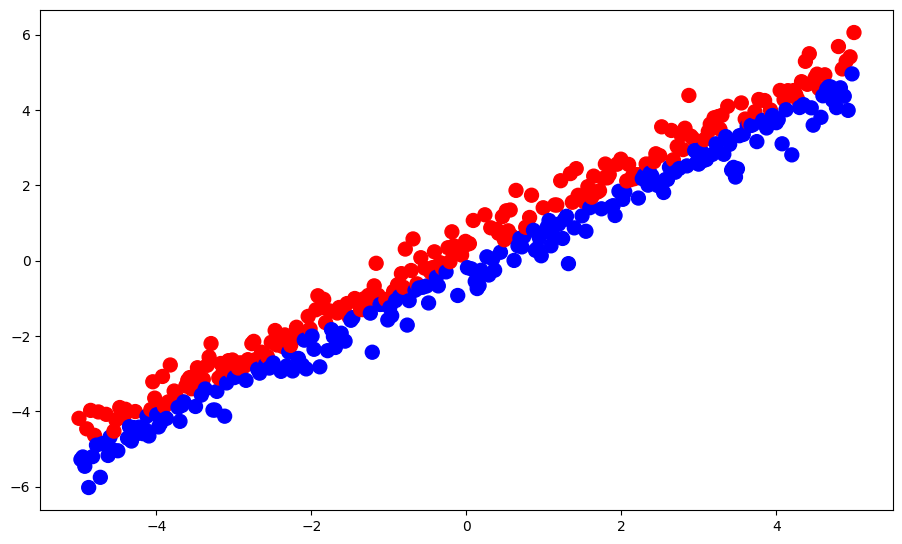

In [3]:
n = 400
np.random.seed(1)
X = np.zeros((n, 2))
X[:, 0] = np.linspace(-5, 5, n)
X[:, 1] = X[:, 0] + 0.5 * np.random.normal(size=n)
y = (X[:, 1] > X[:, 0]).astype(int)

plt.scatter(X[:, 0], X[:, 1], s=100, c=y, cmap='bwr')
plt.show()

Для удобства, напишем функцию для обучения классификатора и построения графика с разделяющей прямой.

In [4]:
def train_model(model=LogisticRegression()):

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=13)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    plot_decision_regions(X_test, y_test, model)
    plt.show()

    print(f"Accuracy: {accuracy_score(y_pred, y_test):.2f}")

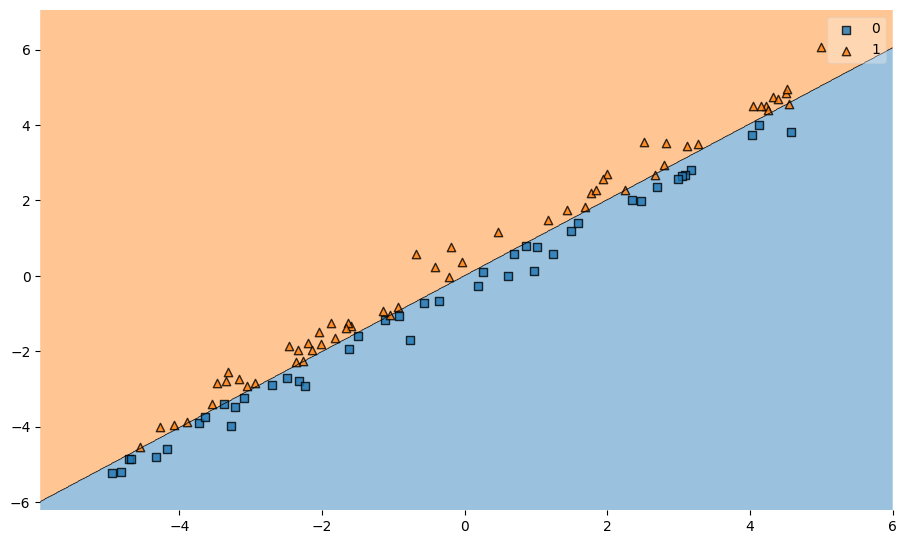

Accuracy: 0.98


In [5]:
train_model(LogisticRegression())

Сравним качество, так ли хорошо получится решить эту задачу не логитической регрессией, а деревом решений на линейно разделимой выборке?

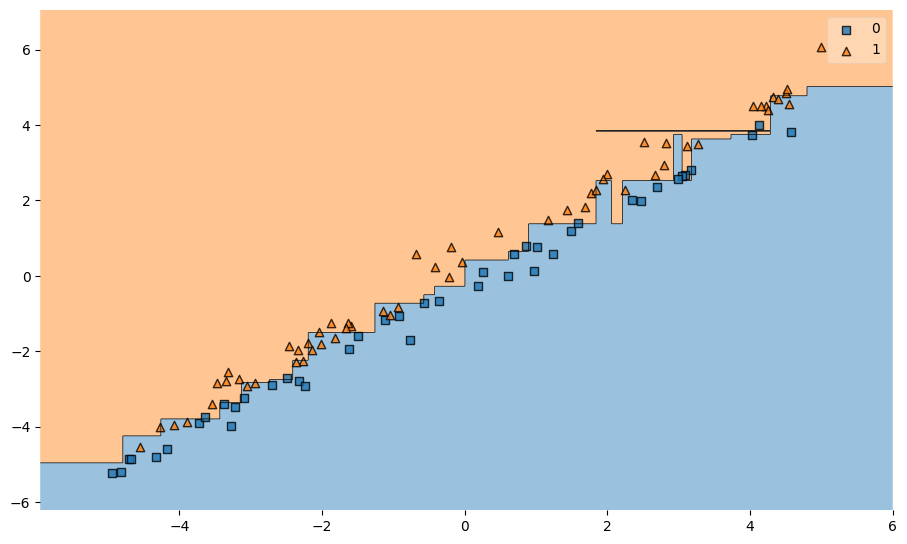

Accuracy: 0.74


In [6]:
train_model(DecisionTreeClassifier(random_state=13))

Давайте вспомним, что такое логическое исключающее ИЛИ, и сгенерируем пример выборки.

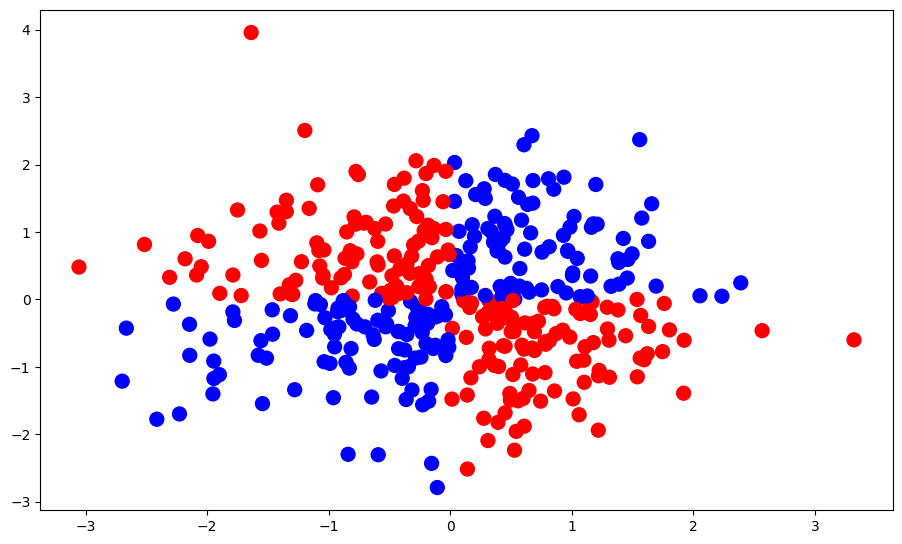

In [7]:
X = np.random.randn(n, 2)
y = np.logical_xor(X[:, 0] > 0, X[:, 1] > 0).astype(int)
plt.scatter(X[:, 0], X[:, 1], s=100, c=y, cmap="bwr")
plt.show()

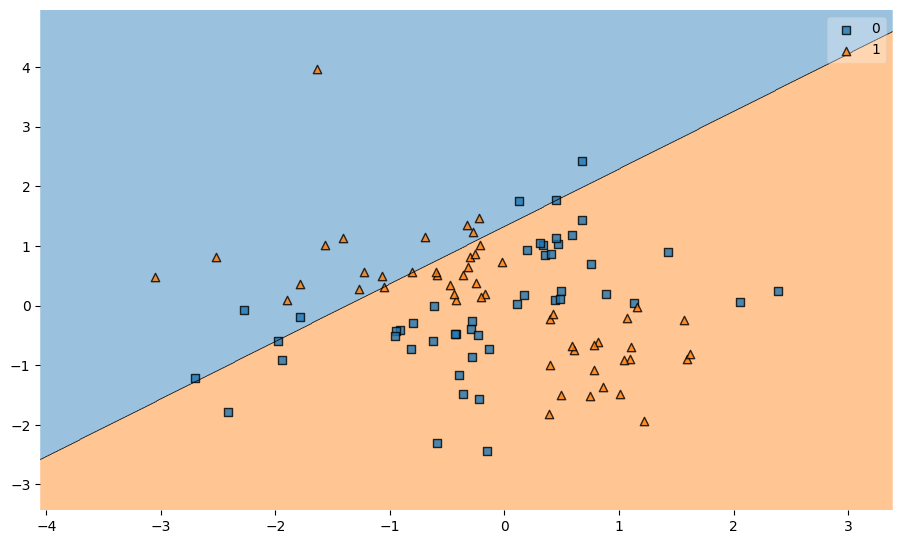

Accuracy: 0.42


In [8]:
train_model(LogisticRegression())

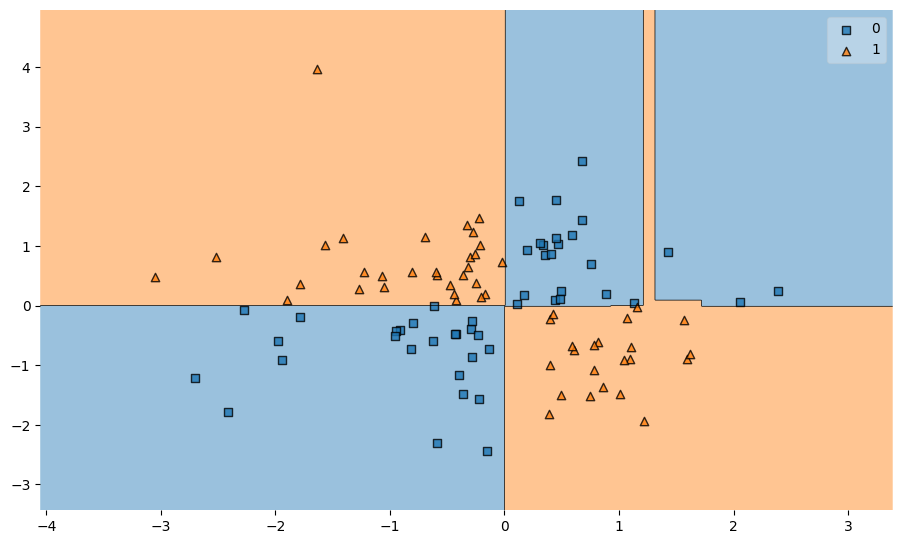

Accuracy: 1.00


In [9]:
train_model(DecisionTreeClassifier())

### Переобучение <a name="overfitting"></a>

Решающие деревья могут переобучаться под любую выборку, если их не регуляризовать: при большом количестве листьев для каждого объекта может выделиться своя область в признаковом пространстве. Дерево просто выучивает обучающую выборку, но не выделяет закономерности в данных. Давайте убедимся в этом на практике.

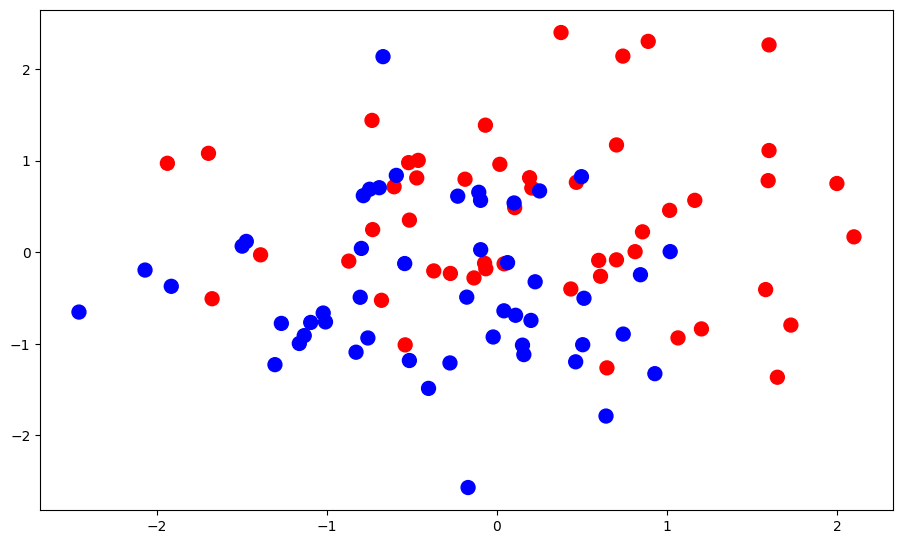

In [10]:
np.random.seed(13)
n = 100
X = np.random.normal(size=(n, 2))
X[:50, :] += 0.25
X[50:, :] -= 0.25
y = np.array([1] * 50 + [0] * 50)
plt.scatter(X[:, 0], X[:, 1], s=100, c=y, cmap="bwr")
plt.show()

Проверим, как разные значения гиперпараметров решающего дерева влияют на его структуру:

- `max_depth`: максимальная глубина дерева
- `min_samples_leaf`: минимальное число объектов в вершине дерева, необходимое для того, чтобы она стала листом

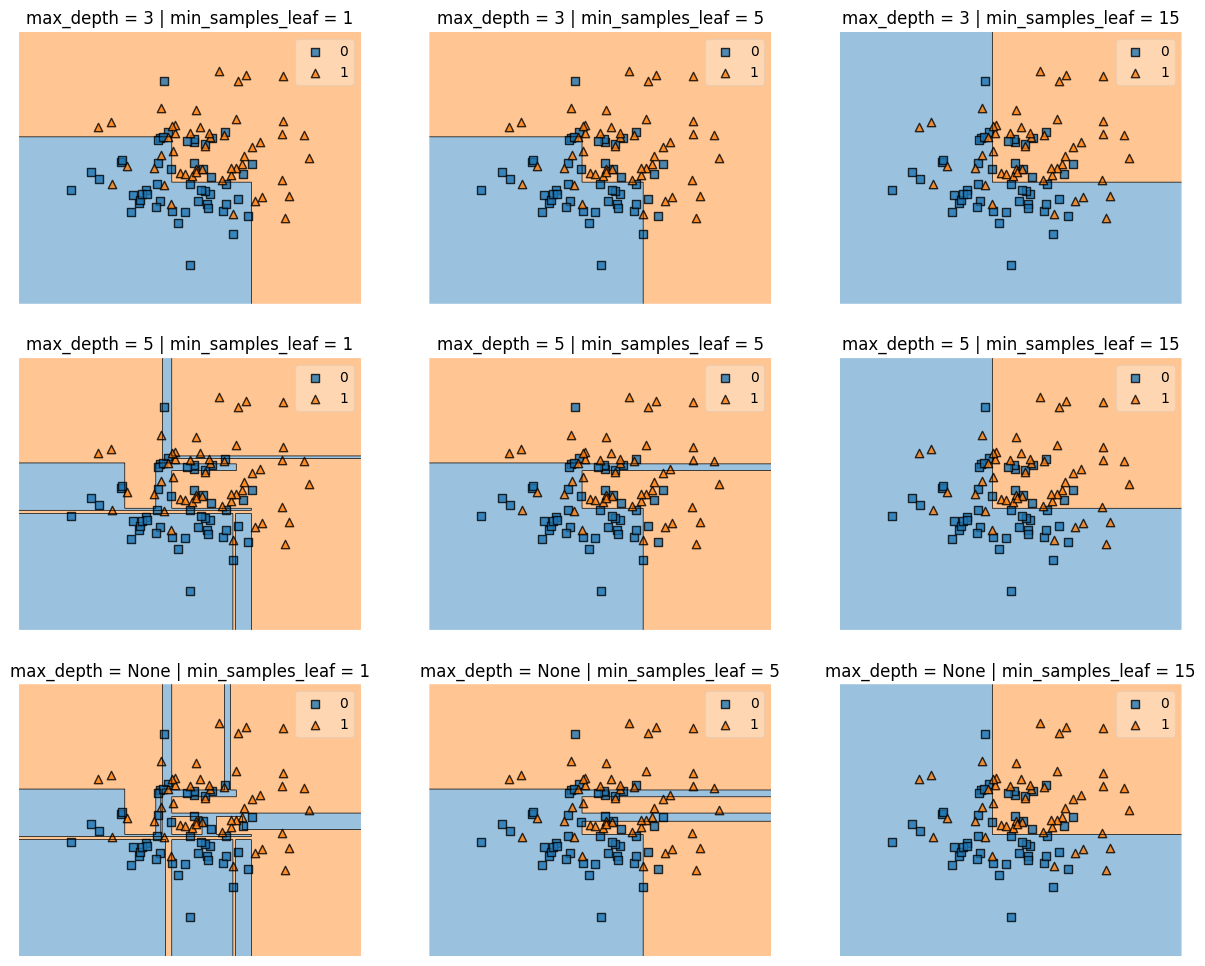

In [11]:
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))

for i, max_depth in enumerate([3, 5, None]):
    for j, min_samples_leaf in enumerate([1, 5, 15]):
        dt = DecisionTreeClassifier(max_depth=max_depth, min_samples_leaf=min_samples_leaf, random_state=13)
        dt.fit(X, y)
        ax[i][j].set_title("max_depth = {} | min_samples_leaf = {}".format(max_depth, min_samples_leaf))
        ax[i][j].axis("off")
        plot_decision_regions(X, y, dt, ax=ax[i][j])

plt.show()

На любой выборке (исключая те, где есть объекты с одинаковыми значениями признаков, но разными ответами) можно получить нулевую ошибку - с помощью максимально переобученного дерева:

Accuracy: 0.74


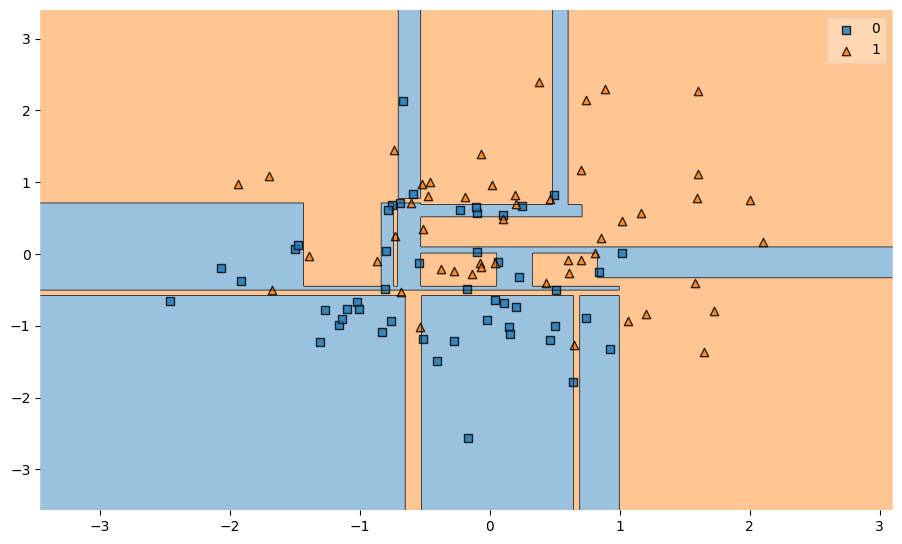

In [12]:
model = DecisionTreeClassifier(max_depth=None, min_samples_leaf=1, random_state=13)
model.fit(X, y)

print(f"Accuracy: {accuracy_score(y, dt.predict(X)):.2f}")

plot_decision_regions(X, y, model)
plt.show()

### Неустойчивость  <a name="unstable"></a>

Как будет меняться структура дерева, если брать для обучения разные 90%-ые подвыборки из исходной?

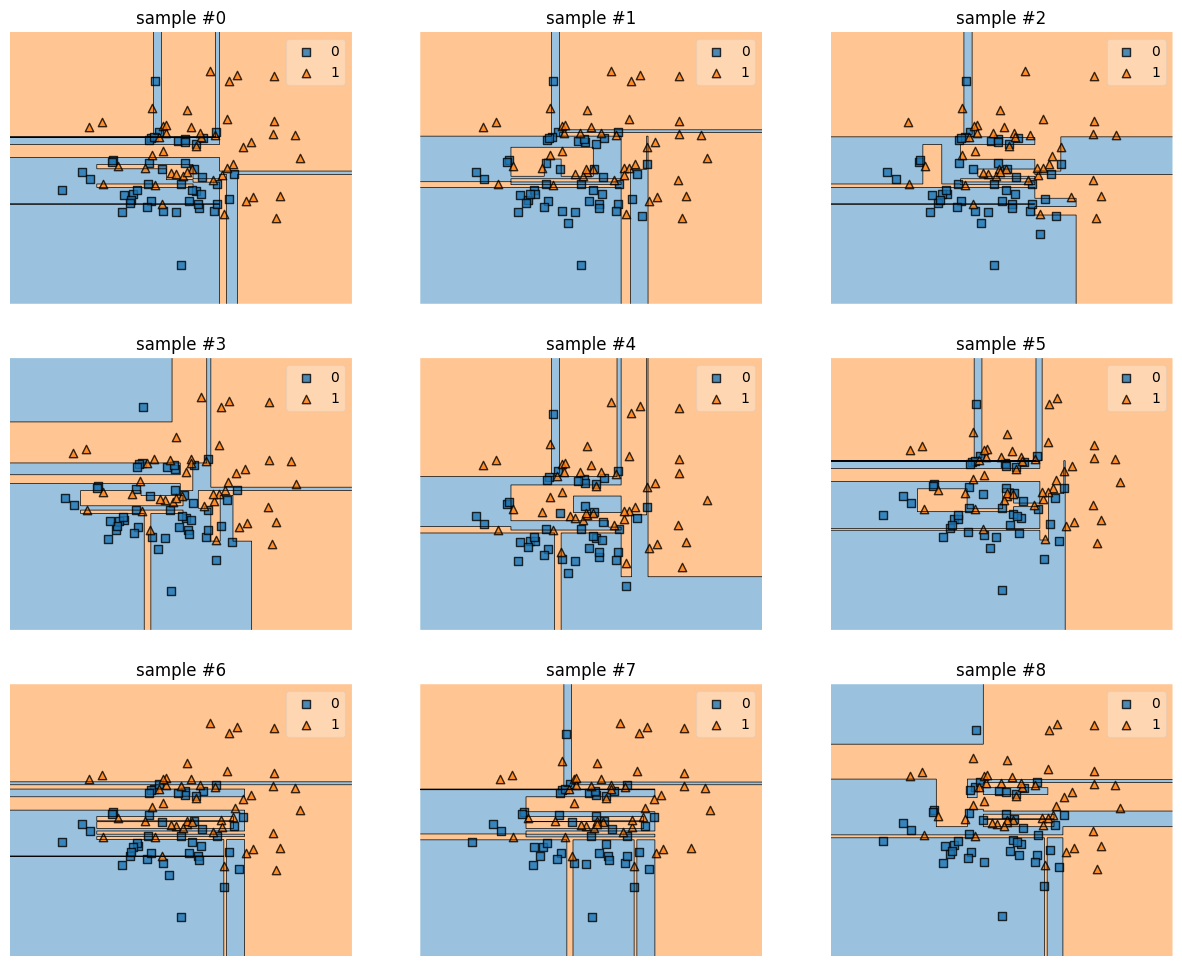

In [13]:
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))

for i in range(3):
    for j in range(3):
        seed_idx = 3 * i + j
        np.random.seed(seed_idx)
        dt = DecisionTreeClassifier(random_state=13)
        idx_part = np.random.choice(len(X), replace=False, size=int(0.9 * len(X)))
        X_part, y_part = X[idx_part, :], y[idx_part]
        dt.fit(X_part, y_part)
        ax[i][j].set_title("sample #{}".format(seed_idx))
        ax[i][j].axis("off")
        plot_decision_regions(X_part, y_part, dt, ax=ax[i][j])

plt.show()

### Датасет  <a name="dataset"></a>

Построим решающее дерево для какого-нибудь набора данных.

In [17]:
california = fetch_california_housing()

In [18]:
X = pd.DataFrame(data=california["data"], columns=california["feature_names"])
y = california["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=13)

print(f"Shape: {X.shape}")
X.head()

Shape: (20640, 8)


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


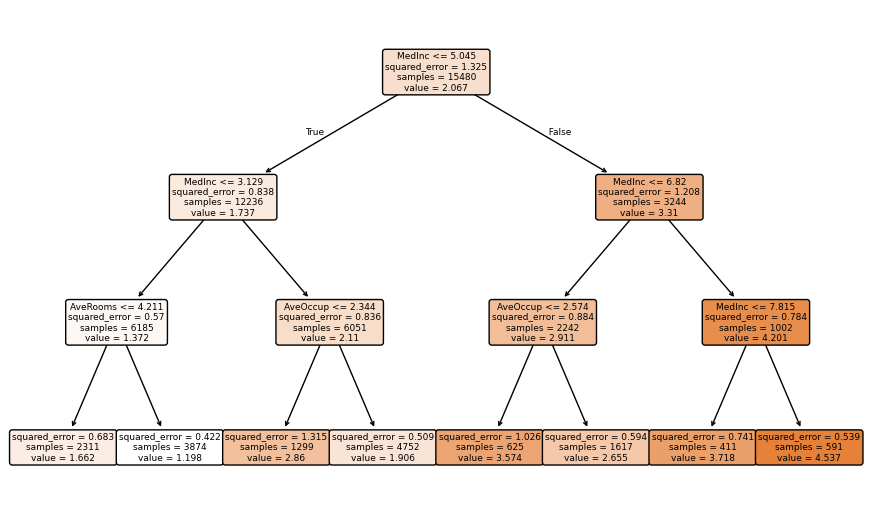

In [19]:
tree = DecisionTreeRegressor(max_depth=3, random_state=13)
tree.fit(X_train, y_train)

plot_tree(tree, feature_names=X.columns, filled=True, rounded=True)
plt.show()

In [23]:
n_nodes = tree.tree_.node_count
children_left = tree.tree_.children_left
children_right = tree.tree_.children_right
feature = tree.tree_.feature
threshold = tree.tree_.threshold

In [24]:
children_left

array([ 1,  2,  3, -1, -1,  6, -1, -1,  9, 10, -1, -1, 13, -1, -1],
      dtype=int64)

In [25]:
feature

array([ 0,  0,  2, -2, -2,  5, -2, -2,  0,  5, -2, -2,  0, -2, -2],
      dtype=int64)

In [26]:
threshold

array([ 5.04544997,  3.12880003,  4.21132112, -2.        , -2.        ,
        2.34443891, -2.        , -2.        ,  6.81959987,  2.57430375,
       -2.        , -2.        ,  7.81515002, -2.        , -2.        ])

In [27]:
round(mean_squared_error(y_test, tree.predict(X_test)), 1)

0.6

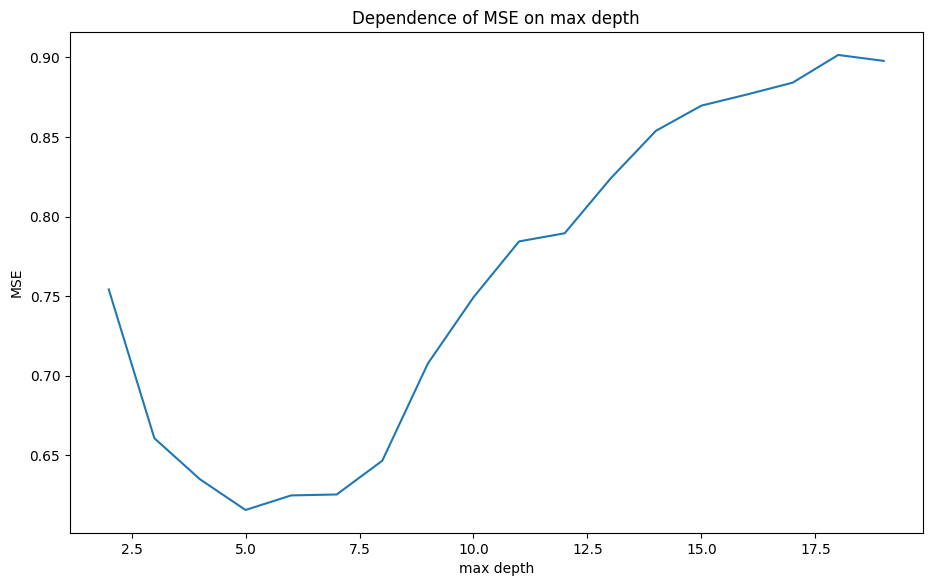

In [28]:
from sklearn.model_selection import cross_val_score

max_depth_array = range(2, 20)
mse_array = []

for max_depth in max_depth_array:
    tree = DecisionTreeRegressor(max_depth=max_depth, random_state=13)
#     tree.fit(X_train, y_train)
#     mse_array.append(mean_squared_error(y_test, tree.predict(X_test)))
    mse = -cross_val_score(tree, X, y, cv=3, scoring='neg_mean_squared_error').mean()
    mse_array.append(mse)


plt.plot(max_depth_array, mse_array)
plt.title("Dependence of MSE on max depth")
plt.xlabel("max depth")
plt.ylabel("MSE")
plt.show()

In [29]:
pd.DataFrame({"max_depth": max_depth_array,"MSE": mse_array}).sort_values(by="MSE").reset_index(drop=True)[:5]

,max_depth,MSE
0,5,0.615718
1,6,0.624868
2,7,0.625452
3,4,0.635021
4,8,0.646687


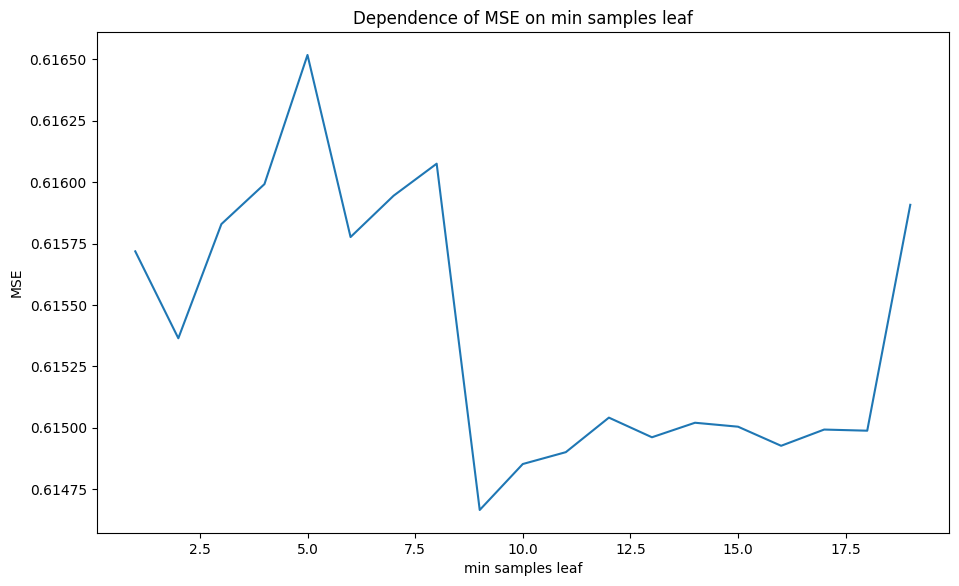

In [30]:
min_samples_leaf_array = range(1, 20)
mse_array = []

for min_samples_leaf in min_samples_leaf_array:
    dt = DecisionTreeRegressor(max_depth=5, min_samples_leaf=min_samples_leaf, random_state=13)
    res = -cross_val_score(dt, X, y, cv=3, scoring='neg_mean_squared_error').mean()
    mse_array.append(res)

plt.plot(min_samples_leaf_array, mse_array)
plt.title("Dependence of MSE on min samples leaf")
plt.xlabel("min samples leaf")
plt.ylabel("MSE")
plt.show()

In [31]:
pd.DataFrame({"min_samples_leaf": min_samples_leaf_array,"MSE": mse_array}).sort_values(by="MSE").reset_index(drop=True)[:5]

,min_samples_leaf,MSE
0,9,0.614665
1,10,0.614852
2,11,0.614900
3,16,0.614926
4,13,0.614961


In [32]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2)

In [33]:
tree = DecisionTreeRegressor()

tree.fit(Xtrain, ytrain)

pred_train = tree.predict(Xtrain)
pred_test = tree.predict(Xtest)

In [34]:
from sklearn.metrics import r2_score

r2_score(ytrain, pred_train), r2_score(ytest, pred_test)

(1.0, 0.5874995703970891)

In [35]:
tree2 = DecisionTreeRegressor(max_depth = 5, min_samples_leaf = 9)

tree2.fit(Xtrain, ytrain)

pred_train2 = tree2.predict(Xtrain)
pred_test2 = tree2.predict(Xtest)

r2_score(ytrain, pred_train2), r2_score(ytest, pred_test2)

(0.6284080451098546, 0.608284643259587)

In [36]:
from sklearn.model_selection import GridSearchCV

params = {'max_depth' : np.arange(2, 12),
          'max_features' : ["auto", "sqrt", "log2"] }

gs = GridSearchCV(DecisionTreeRegressor(), params, cv=3, scoring='r2')

gs.fit(X, y)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
30 fits failed out of a total of 90.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_

GridSearchCV(cv=3, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
                         'max_features': ['auto', 'sqrt', 'log2']},
             scoring='r2')

In [38]:
gs.best_estimator_, gs.best_score_

(DecisionTreeRegressor(max_depth=8, max_features='log2'), 0.46123768267847237)

In [49]:
path = tree.cost_complexity_pruning_path(Xtrain, ytrain)
alphas = path['ccp_alphas']

alphas[::10]

array([0.00000000e+00, 1.07579750e-19, 4.30319002e-19, ...,
       3.41135587e-03, 6.18652463e-03, 1.61276995e-02])

In [42]:
len(alphas)

14847

In [ ]:
from tqdm import tqdm
import seaborn as sns
from sklearn.metrics import r2_score

accuracy_train,accuracy_test=[],[]
MaxR2 = -1
Alpha = 0

for i in tqdm(alphas[::10]):
    tree = DecisionTreeRegressor(ccp_alpha = i)

    tree.fit(Xtrain, ytrain)
    y_train_pred = tree.predict(Xtrain)
    y_test_pred = tree.predict(Xtest)

    accuracy_train.append(r2_score(ytrain, y_train_pred))
    accuracy_test.append(r2_score(ytest, y_test_pred))

    R2 = r2_score(ytest, y_test_pred)
    if R2 > MaxR2:
        MaxR2 = R2
        Alpha = i


sns.set()
plt.figure(figsize=(14,7))
sns.lineplot(y = accuracy_train, x = alphas[::10], label = "Train r2")
sns.lineplot(y = accuracy_test, x = alphas[::10], label = "Test r2")
plt.xticks(ticks = np.arange(0.00,0.25,0.01))
plt.show()

 67%|██████▋   | 1000/1485 [13:57<11:19,  1.40s/it]

In [ ]:
Alpha

0.01910378669444384

In [ ]:
tree3 = DecisionTreeRegressor(ccp_alpha = Alpha)

tree3.fit(Xtrain, ytrain)

pred_train3 = tree3.predict(Xtrain)
pred_test3 = tree3.predict(Xtest)

r2_score(ytrain, pred_train3), r2_score(ytest, pred_test3)

(0.9495246950087202, 0.8707036082747672)

##  Решающее дерево своими руками

$R_m$ - множество объектов в разбиваемой вершине, $j$ - номер признака, по которому происходит разбиение, $t$ - порог разбиения.

Критерий ошибки:

$$
Q(R_m, j, t) = \frac{|R_\ell|}{|R_m|}H(R_\ell) + \frac{|R_r|}{|R_m|}H(R_r) \to \min_{j, t}
$$

$R_\ell$ - множество объектов в левом поддереве, $R_r$ - множество объектов в правом поддереве.

$H(R)$ - критерий информативности, с помощью которого можно оценить качество распределения целевой переменной среди объектов множества $R$.

_Реализуйте подсчет критерия ошибки. Для этого реализуйте функции для подсчета значения критерия информативности, а также для разбиения вершины._

In [ ]:
california = fetch_california_housing()
X = pd.DataFrame(data=california["data"], columns=california["feature_names"])
X["target"] = california["target"]

X_train, X_test = train_test_split(X, test_size=0.25, random_state=13)

In [ ]:
from typing import Iterable, List, Tuple

def H(R: pd.DataFrame) -> float:
    """
    Compute impurity criterion for a fixed set of objects R.
    Last column is assumed to contain target value
    """
    return R["target"].var()


def split_node(R_m: np.ndarray, feature: str, t: float) -> Tuple[np.ndarray, np.ndarray]:
    """
    Split a fixed set of objects R_m given feature number and threshold t
    """
    mask = R_m[feature] <= t
    return R_m.loc[mask], R_m.loc[~mask]


def q_error(R_m: np.ndarray, feature: str, t: float) -> float:
    """
    Compute error criterion for given split parameters
    """
    R_l, R_r = split_node(R_m, feature, t)
    return len(R_l) / len(R_m) * H(R_l) + len(R_r) / len(R_m) * H(R_r)

_Переберите все возможные разбиения выборки по одному из признаков и постройте график критерия ошибки в зависимости от значения порога._

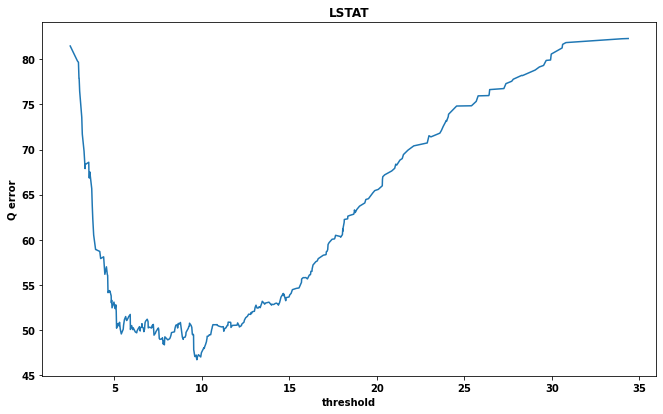

In [ ]:
feature = "MedInc"
Q_array = []

feature_values = np.unique(X_train[feature])
for t in feature_values:
    Q_array.append(q_error(X_train, feature, t))

plt.plot(feature_values, Q_array)
plt.title(feature)
plt.xlabel("threshold")
plt.ylabel("Q error")
plt.show()

_Напишите функцию, находящую оптимальное разбиение данной вершины по данному признаку._

In [ ]:
def get_optimal_split(R_m: np.array, feature: str) -> Tuple[float, List[float]]:
    Q_array = []
    feature_values = np.unique(R_m[feature])

    for t in feature_values:
        Q_array.append(q_error(R_m, feature, t))

    Q_array = np.nan_to_num(Q_array, nan=float("+inf"))

    opt_threshold = feature_values[np.argmin(Q_array)]

    return opt_threshold, Q_array

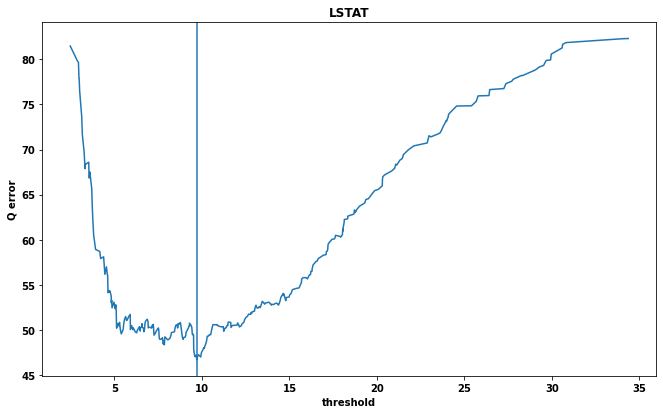

In [ ]:
t, Q_array = get_optimal_split(X_train, feature)
plt.plot(np.unique(X_train[feature]), Q_array)
plt.title(feature)
plt.xlabel("threshold")
plt.ylabel("Q error")
plt.axvline(x=t)
plt.show()

_Постройте графики критерия ошибки (в зависимости от количества объектов в левом поддереве) для каждого из признаков. Найдите признак, показывающий наилучшее качество. Какой это признак? Каков порог разбиения и значение качества? Постройте график критерия ошибки для данного признака в зависимости от значения порога._

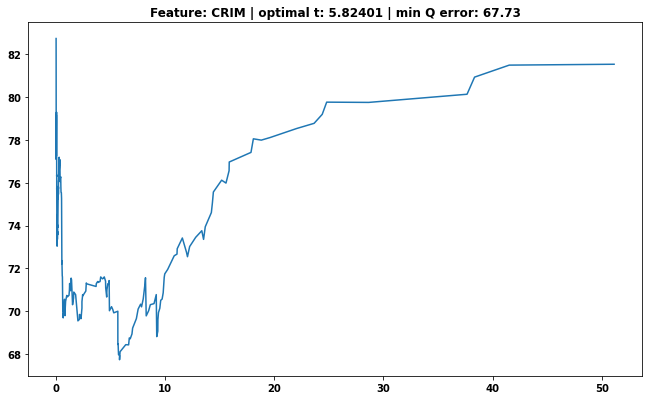

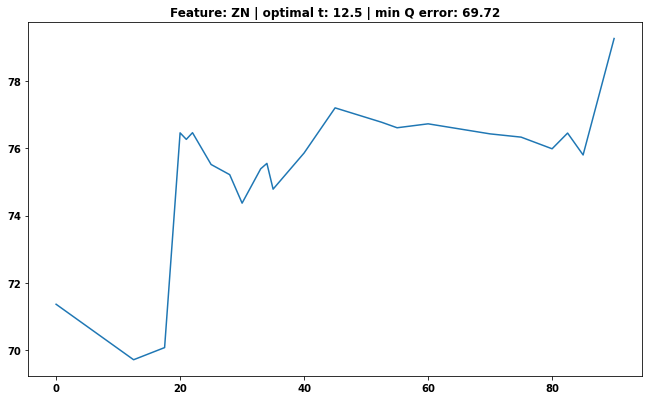

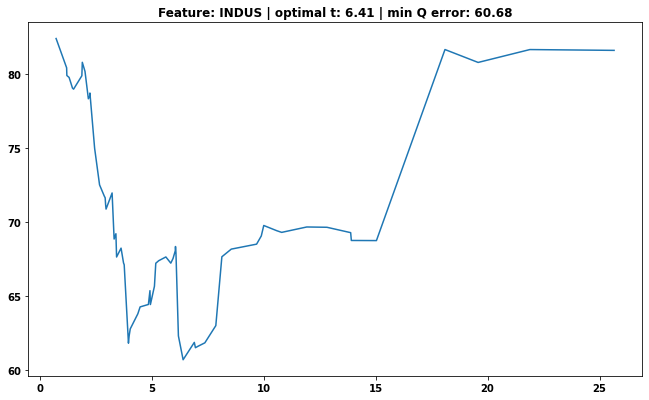

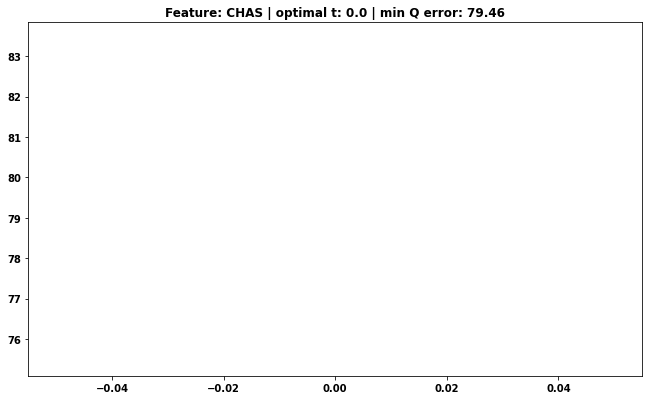

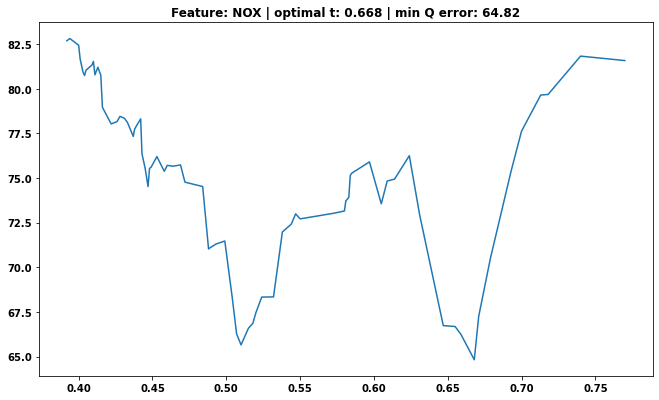

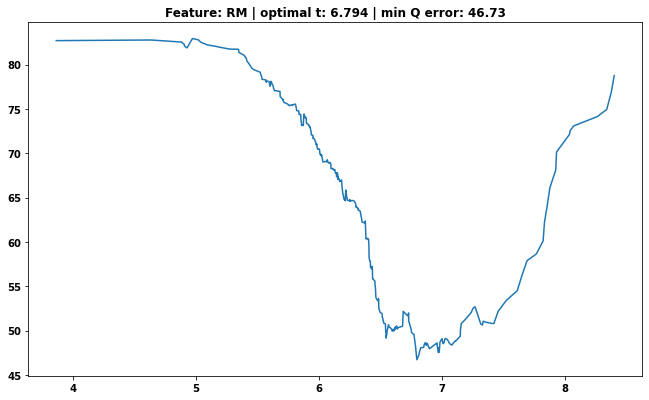

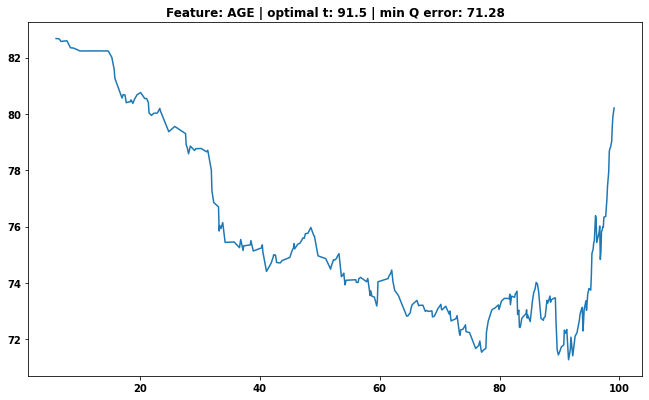

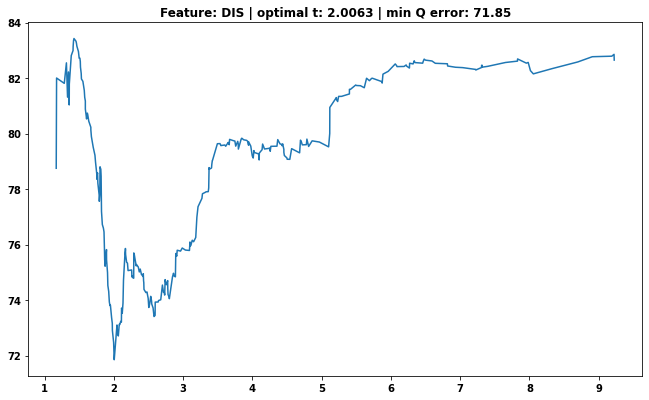

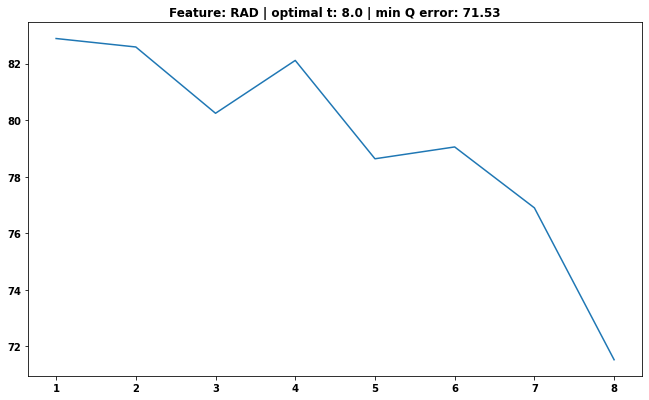

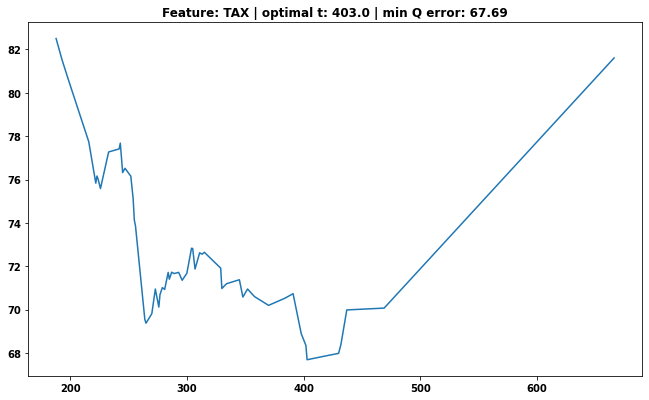

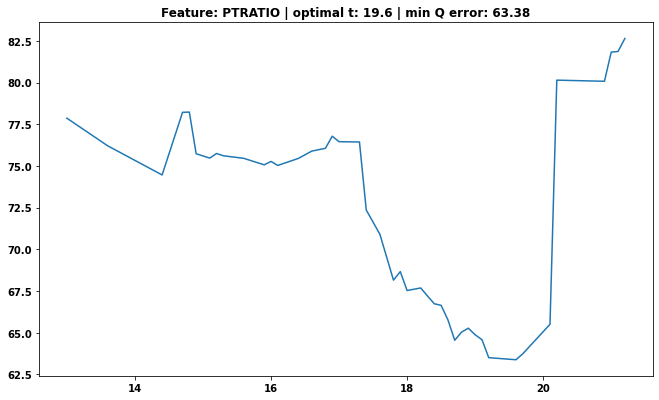

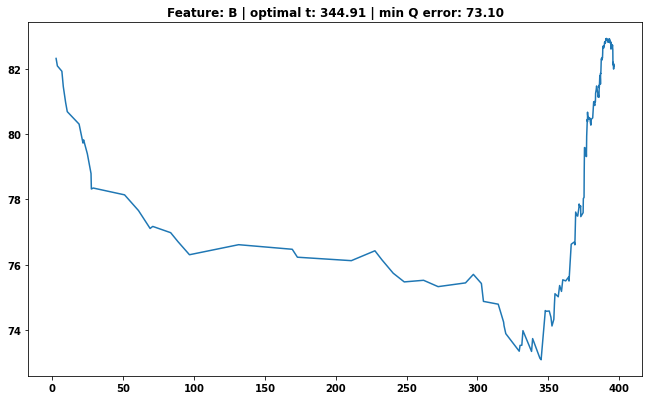

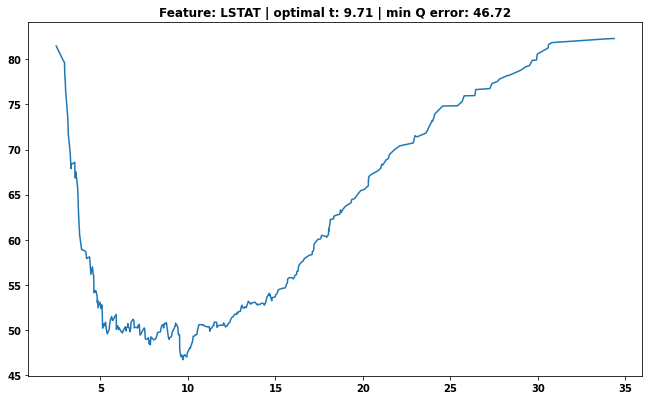

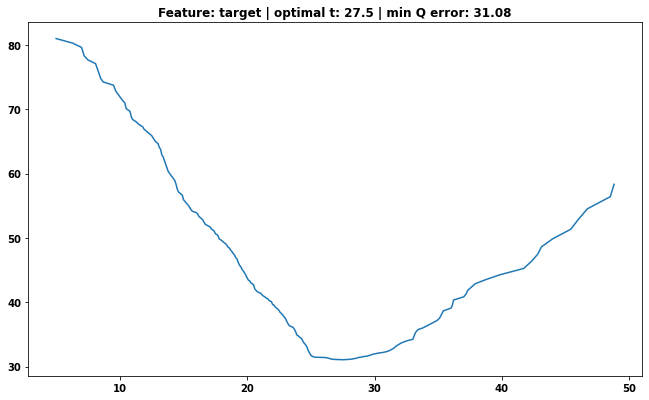

[('target', 27.5, 31.076842051873854),
 ('LSTAT', 9.71, 46.71578926625974),
 ('RM', 6.794, 46.73151006817983),
 ('INDUS', 6.41, 60.679814320810095),
 ('PTRATIO', 19.6, 63.38235163124333),
 ('NOX', 0.668, 64.82160091734985),
 ('TAX', 403.0, 67.69401458031751),
 ('CRIM', 5.82401, 67.73396285468317),
 ('ZN', 12.5, 69.71950632098546),
 ('AGE', 91.5, 71.28166496609492),
 ('RAD', 8.0, 71.52693129585947),
 ('DIS', 2.0063, 71.8487495757931),
 ('B', 344.91, 73.09628516456316),
 ('CHAS', 0.0, 79.46129728972997)]

In [ ]:
results = []

for f in X_train.columns:
    t, Q_array = get_optimal_split(X_train, f)
    min_error = min(Q_array)
    results.append((f, t, min_error))
    plt.figure()
    plt.title("Feature: {} | optimal t: {} | min Q error: {:.2f}".format(f, t, min_error))
    plt.plot(np.unique(X_train[f]), Q_array)
    plt.show()

results = sorted(results, key=lambda x: x[2])
results

In [ ]:
pd.DataFrame(results, columns=["feature", "optimal t", "min Q error"])

,feature,optimal t,min Q error
0,target,27.50000,31.076842
1,LSTAT,9.71000,46.715789
2,RM,6.79400,46.731510
3,INDUS,6.41000,60.679814
4,PTRATIO,19.60000,63.382352
5,NOX,0.66800,64.821601
6,TAX,403.00000,67.694015
7,CRIM,5.82401,67.733963
8,ZN,12.50000,69.719506
9,AGE,91.50000,71.281665


In [ ]:
optimal_feature, optimal_t, optimal_error = results[1]

In [ ]:
print(optimal_feature)
print(optimal_t)
print(optimal_error)

DIS
2.0063
71.8487495757931


_Изобразите разбиение визуально. Для этого постройте диаграмму рассеяния целевой переменной в зависимости от значения найденного признака. Далее изобразите вертикальную линию, соответствующую порогу разбиения. Почему это разбиение может быть лучшим? Как вы можете интерпретировать результат?_

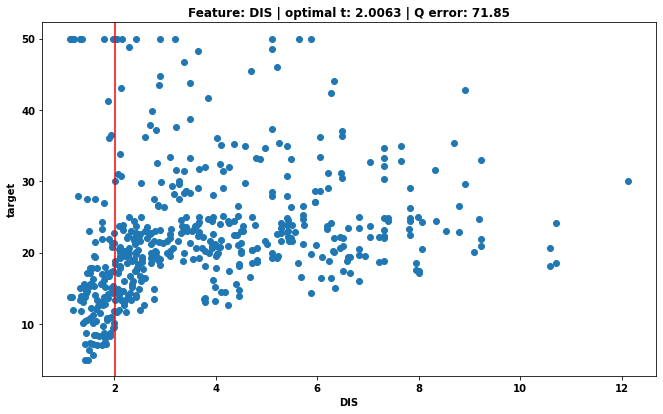

In [ ]:
plt.scatter(X[optimal_feature], y)
plt.axvline(x=optimal_t, color="red")
plt.xlabel(optimal_feature)
plt.ylabel("target")
plt.title("Feature: {} | optimal t: {} | Q error: {:.2f}".format(optimal_feature, optimal_t, optimal_error))
plt.show()

## Бонус

Здесь можно посмотреть, как работает стрижка (cost-complexity pruning) для снижения переобучения деревьев: [ноутбук](https://colab.research.google.com/drive/1SGGaIGgo1wOsvBdPfiBb0128emHnu3Oo?usp=sharing).